<h1><b>Method 1: using Facebook prophet model</b></h1>

In [29]:
import warnings
warnings.simplefilter('ignore')

<b>Importing the necessary libraries</b>

In [30]:
!pip install pystan
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import files
uploaded=files.upload()

Saving Assignment_Data_vF.csv to Assignment_Data_vF.csv


In [2]:
import pandas as pd

#Importing the data
data=pd.read_csv('Assignment_Data_vF.csv')

data.head()

,DATE,Open,High,Low,Close,Adj Close,Volume
0,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0
1,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0
2,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0
3,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0
4,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0


In [3]:
#Adding a date column to the data in order to use the Prophet model
data['date'] = pd.date_range(start='1/1/2019', periods=len(data), freq='D')
data.head()

,DATE,Open,High,Low,Close,Adj Close,Volume,date
0,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0,2019-01-01
1,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0,2019-01-02
2,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0,2019-01-03
3,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0,2019-01-04
4,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0,2019-01-05


<b>Data Cleaning and Preprocessing</b>

In [4]:
data.isnull().sum()

DATE         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
date         0
dtype: int64

In [5]:
#Removing null values
data=data.dropna()

In [6]:
data.shape

(1163, 8)

In [7]:
data.describe()

,DATE,Open,High,Low,Close,Adj Close,Volume
count,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000,1.163000e+03
mean,584.325021,12262.283757,12322.435465,12175.467229,12250.760362,12250.760362,4.157183e+05
std,337.217338,2514.980126,2521.722058,2500.592862,2513.511192,2513.511192,2.322899e+05
min,1.000000,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,292.500000,10562.000000,10609.774905,10493.550295,10550.425295,10550.425295,2.401500e+05
50%,585.000000,11359.799810,11398.150390,11274.000000,11341.150390,11341.150390,3.575000e+05
75%,876.500000,13787.400390,13891.774905,13667.649905,13789.049810,13789.049810,5.640500e+05
max,1167.000000,18602.349610,18604.449220,18445.300780,18477.050780,18477.050780,1.811000e+06


<b>Visualising the data</b>

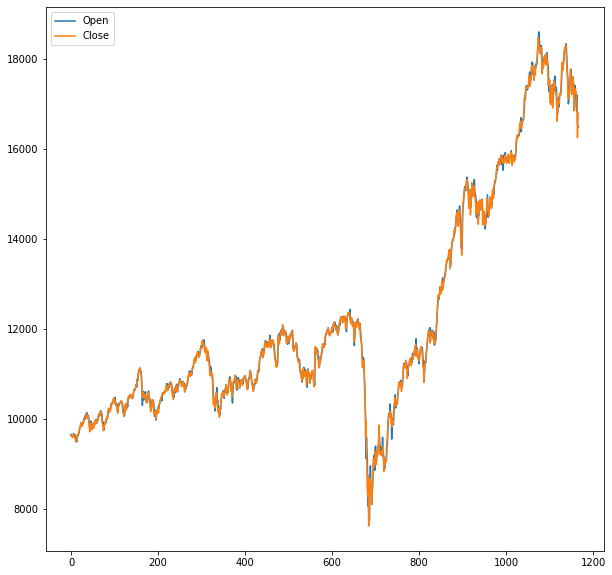

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(data['Open'],label="Open")
plt.plot(data['Close'],label="Close")
plt.legend()
plt.show()

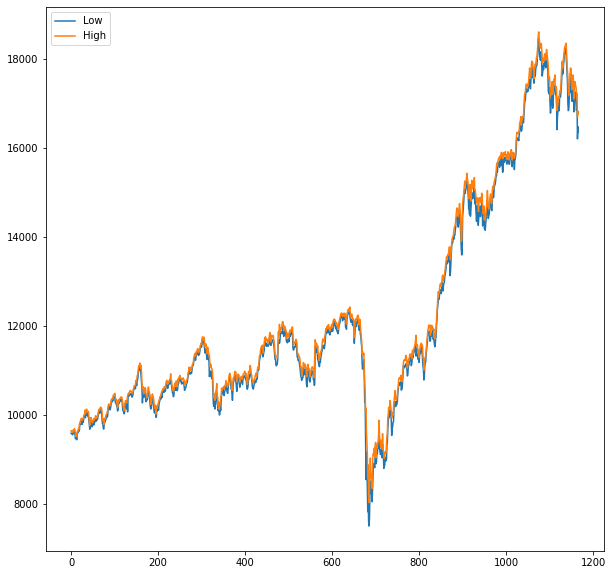

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(data['Low'],label="Low")
plt.plot(data['High'],label="High")
plt.legend()
plt.show()

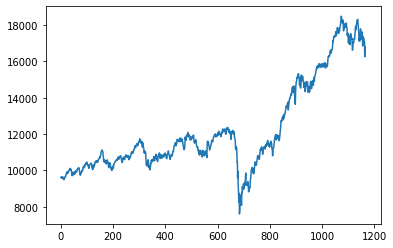

In [10]:
data['Adj Close'].plot()

To use the prophet model, we only need the date and the output column.
So we will drop everything else.

In [11]:
data=data[['date','Adj Close']]
data1=data

In [42]:
data=data.rename(columns={'date':'ds','Adj Close':'y'})

In [43]:
#Importing the pre trained model
from fbprophet import Prophet

In [44]:
#Defining the confidence interval of the model and fitting it to the data
m = Prophet(interval_width=0.95)
model = m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
#Defining the future data
future=m.make_future_dataframe(periods=30,freq='D')

In [46]:
#Predicting future stock prices
forecast=m.predict(future)

In [47]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,9224.811857,9013.765288,10441.934987,9224.811857,9224.811857,512.860955,512.860955,512.860955,7.436168,7.436168,7.436168,505.424787,505.424787,505.424787,0.0,0.0,0.0,9737.672812
1,2019-01-02,9236.386030,9007.019252,10439.783109,9236.386030,9236.386030,492.011366,492.011366,492.011366,2.845542,2.845542,2.845542,489.165823,489.165823,489.165823,0.0,0.0,0.0,9728.397396
2,2019-01-03,9247.960203,8977.063925,10417.782045,9247.960203,9247.960203,479.409960,479.409960,479.409960,5.877053,5.877053,5.877053,473.532907,473.532907,473.532907,0.0,0.0,0.0,9727.370163
3,2019-01-04,9259.534376,8962.330356,10452.760752,9259.534376,9259.534376,459.781350,459.781350,459.781350,1.205765,1.205765,1.205765,458.575584,458.575584,458.575584,0.0,0.0,0.0,9719.315726
4,2019-01-05,9271.108549,8989.936023,10491.208904,9271.108549,9271.108549,445.114004,445.114004,445.114004,0.783369,0.783369,0.783369,444.330635,444.330635,444.330635,0.0,0.0,0.0,9716.222553


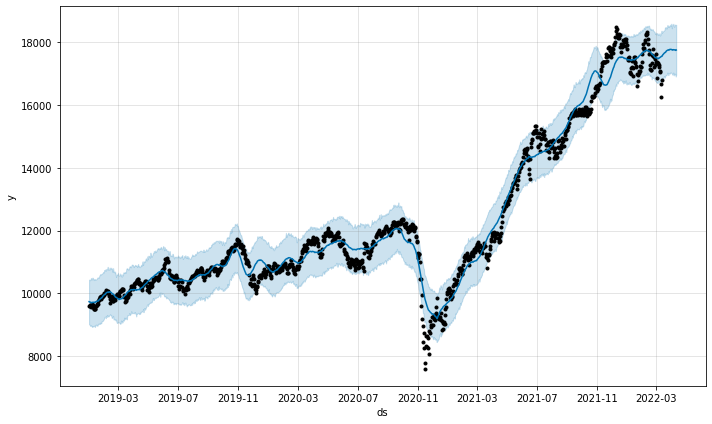

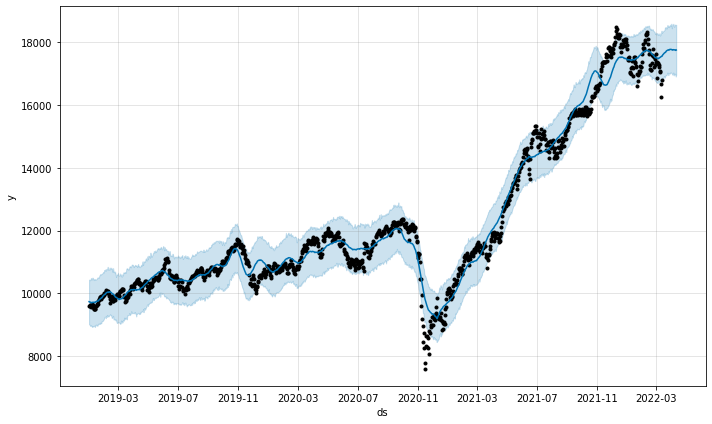

In [48]:
#Visualising the predicted values
m.plot(forecast)

In [49]:
output=forecast[['ds','yhat']]

In [50]:
#Taking the last 30 days
output=output[-30:]

In [51]:
output.head()

,ds,yhat
1163,2022-03-13,17548.479451
1164,2022-03-14,17575.308053
1165,2022-03-15,17604.594279
1166,2022-03-16,17617.960120
1167,2022-03-17,17638.915398


In [52]:
output.to_csv('output_data.csv')

<h1><b>Method 2: Building an LSTM-stacked RNN</b></h1>

In [12]:
#Taking only the 'Adj Close' feature for building the RNN model
data=data1['Adj Close']
data.head()

0    9616.400391
1    9606.900391
2    9618.150391
3    9578.049805
4    9588.049805
Name: Adj Close, dtype: float64

<b>Scaling the data</b>

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#Calling the Scaler object
scaler=MinMaxScaler()

#Transforming the data
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [14]:
data[:10]

array([[0.18461279],
       [0.18373857],
       [0.18477383],
       [0.18108364],
       [0.18200387],
       [0.1883995 ],
       [0.18802682],
       [0.18619552],
       [0.18586427],
       [0.1807984 ]])

<b>Train Test split</b>

In [15]:
train_size=int(len(data)*0.7)
train_size

814

In [16]:
#Taking the first 70 percent data for training
train=data[:814]

#Taking the remaining data for validation data
test=data[814:]

In [17]:
train[0:5]

array([[0.18461279],
       [0.18373857],
       [0.18477383],
       [0.18108364],
       [0.18200387]])

<b>To build the RNN, we need to convert our training data into sequences</b>

In [19]:
def create_sequences(data,seq_len):
  X=[]
  for i in range(seq_len+1,len(data)):
    a=data[i-seq_len:i]
    X.append(a)
  return np.array(X)

In [20]:
#Choosing sequence of length 30 to predict the next value
seq_len=30 + 1

#Converting the training data into a sequence
train_data=create_sequences(train,seq_len)

#Converting the testing data into a sequence
test_data=create_sequences(test,seq_len)



In [21]:
train_data=np.array(train_data)

In [22]:
X=train_data[:,:-1]
y=train_data[:,-1]

In [23]:
test_data=np.array(test_data)

In [24]:
#The first 30 elements form the input
X_test=test_data[:,:-1]

#The last element forms the label
y_test=test_data[:,-1]

<b>Creating the model</b>

In [25]:
#importing the layers to build an RNN
import keras
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense

In [32]:
model=Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(X.shape[1],1)))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(200))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 30, 200)           320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 803,401
Trainable params: 803,401
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Fitting the model
model.fit(X,y,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
25/25 [==============================] - 13s 316ms/step - loss: 0.0100 - val_loss: 0.0597
Epoch 2/300
25/25 [==============================] - 7s 266ms/step - loss: 0.0019 - val_loss: 0.0358
Epoch 3/300
25/25 [==============================] - 6s 260ms/step - loss: 0.0012 - val_loss: 0.0094
Epoch 4/300
25/25 [==============================] - 6s 261ms/step - loss: 9.5049e-04 - val_loss: 9.9063e-04
Epoch 5/300
25/25 [==============================] - 8s 305ms/step - loss: 8.2443e-04 - val_loss: 0.0026
Epoch 6/300
25/25 [==============================] - 7s 268ms/step - loss: 6.7073e-04 - val_loss: 0.0027
Epoch 7/300
25/25 [==============================] - 7s 300ms/step - loss: 6.2033e-04 - val_loss: 0.0039
Epoch 8/300
25/25 [==============================] - 7s 262ms/step - loss: 6.6144e-04 - val_loss: 8.9237e-04
Epoch 9/300
25/25 [==============================] - 6s 261ms/step - loss: 5.4003e-04 - val_loss: 0.0014
Epoch 10/300
25/25 [==============================] - 7s 2

In [35]:
#Saving the model
model.save('timeseries_lstm_30.h5')

In [36]:
#Loading the model
#from tensorflow import keras
#model = keras.models.load_model('timeseries_lstm_30.h5')

<b>To obtain values for the last 30 days, we create a sequence of values to obtain the output</b>

In [37]:
num_days=30

#Initial input
input=data[-30:]

#To store the values of the last 30 days
predicted=[]


for num in range(num_days):
  #Predicted value by the model
  pred=model.predict(np.expand_dims(input,axis=0))
  
  #Adding to the list
  predicted.append(pred[0])

  #Reshaping the input to keep the loop working
  input=list(input.reshape(1,30)[0])
  input=input[1:]
  input.append(pred[0][0])
  input=np.array(input)
  input=input.reshape(30,1)


In [45]:
#Transform the predicted value into actual values by transforming the values to the original data
predicted=scaler.inverse_transform(predicted)

In [46]:
new_pred=list(predicted.reshape(1,30))

In [47]:
#Converting the array into a list
new_pred[0]

array([15566.89720617, 13832.4092074 , 12453.93146571, 11737.61500305,
       11521.42920701, 11635.65285915, 11970.71449732, 12447.77626047,
       13002.64407978, 13585.32334837, 14156.69518821, 14681.37089351,
       15121.68472767, 15435.18177301, 15578.57544993, 15519.2657758 ,
       15252.42017287, 14814.43745348, 14281.40108426, 13748.10692574,
       13298.18040075, 12982.43450004, 12816.04867349, 12787.98720745,
       12873.79606676, 13045.47369872, 13277.1271764 , 13546.34664307,
       13832.88786642, 14118.56374681])

In [63]:
#Storing all the values into a list
outp=list(data1['Adj Close'])+(list(new_pred[0]))

<b>Visualising the predicted values</b>

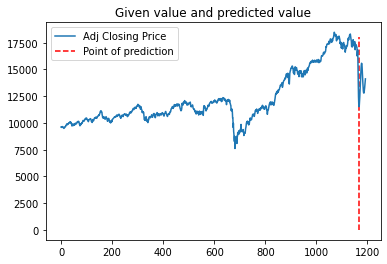

In [71]:
plt.plot(outp,label='Adj Closing Price')
plt.vlines(x=1167,ymin=0,ymax=18000,linestyles='dashed',colors='red',label='Point of prediction')
plt.title('Given value and predicted value')
plt.legend()
plt.show()